/var/folders/y4/yphzsd_j3hbd5rzqwpdq7x9m0000gn/T/ipykernel_84623/2055185705.py:16: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean1 = data1.groupby("terminal_streak_length").mean()["prediction_recode"]
/var/folders/y4/yphzsd_j3hbd5rzqwpdq7x9m0000gn/T/ipykernel_84623/2055185705.py:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean2 = data2.groupby("terminal_streak_length").mean()["prediction_recode"]
/var/folders/y4/yphzsd_j3hbd5rzqwpdq7x9m0000gn/T/ipykernel_84623/2055185705.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_onl

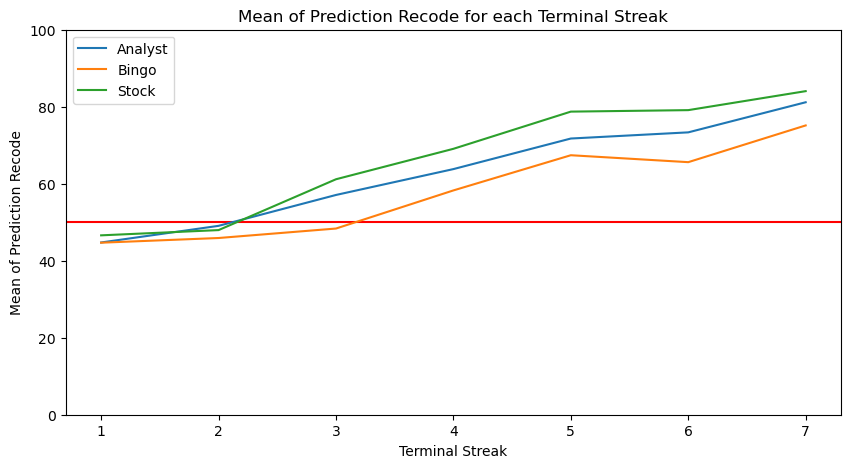

/var/folders/y4/yphzsd_j3hbd5rzqwpdq7x9m0000gn/T/ipykernel_84623/2055185705.py:35: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean1_id = data1.groupby("participant_id").mean()["prediction_recode"]
/var/folders/y4/yphzsd_j3hbd5rzqwpdq7x9m0000gn/T/ipykernel_84623/2055185705.py:36: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean2_id = data2.groupby("participant_id").mean()["prediction_recode"]
/var/folders/y4/yphzsd_j3hbd5rzqwpdq7x9m0000gn/T/ipykernel_84623/2055185705.py:37: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will def

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import shapiro


# Load the data
data = pd.read_excel("../Data/PredictingOutcomes_ParticipantPredictions.xlsx", sheet_name="Study 1A")

# Divide the data based on the generator
data1 = data[data["generator"] == "analyst"]
data2 = data[data["generator"] == "bingo"]
data3 = data[data["generator"] == "stock"]

# Calculate the mean of prediction_recode for each terminal streak from 1 to 7
mean1 = data1.groupby("terminal_streak_length").mean()["prediction_recode"]
mean2 = data2.groupby("terminal_streak_length").mean()["prediction_recode"]
mean3 = data3.groupby("terminal_streak_length").mean()["prediction_recode"]

# Plot the data with y-axis from 0 to 100 and having a solid red line at y=50

plt.figure(figsize=(10, 5))
plt.ylim(0, 100)
plt.axhline(y=50, color="r", linestyle="-")
plt.plot(mean1.index, mean1.values, label="Analyst")
plt.plot(mean2.index, mean2.values, label="Bingo")
plt.plot(mean3.index, mean3.values, label="Stock")
plt.xlabel("Terminal Streak")
plt.ylabel("Mean of Prediction Recode")
plt.title("Mean of Prediction Recode for each Terminal Streak")
plt.legend()
plt.show()

# Calculate the mean of prediction_recode for each participant_id
mean1_id = data1.groupby("participant_id").mean()["prediction_recode"]
mean2_id = data2.groupby("participant_id").mean()["prediction_recode"]
mean3_id = data3.groupby("participant_id").mean()["prediction_recode"]

# Check if the data is normally distributed
shapiro_test1 = shapiro(mean1_id.values)
shapiro_test2 = shapiro(mean2_id.values)
shapiro_test3 = shapiro(mean3_id.values)



In [24]:
import statsmodels.regression.mixed_linear_model as sm
import scipy.stats as stats

# Load the data
data = pd.read_excel("../Data/PredictingOutcomes_ParticipantPredictions.xlsx", sheet_name="Study 1A")

# apply a one way mixed anova to test the effect of condition and one within streak length on the rating of probability that the terminal streak would repeat
model = sm.MixedLM.from_formula("prediction_recode ~ C(generator) ", data, groups=data["participant_id"])
result = model.fit()
print(result.summary())


             Mixed Linear Model Regression Results
Model:             MixedLM Dependent Variable: prediction_recode
No. Observations:  2592    Method:             REML             
No. Groups:        144     Scale:              715.5165         
Min. group size:   18      Log-Likelihood:     -12215.4169      
Max. group size:   18      Converged:          Yes              
Mean group size:   18.0                                         
----------------------------------------------------------------
                      Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------------
Intercept             51.836    1.049 49.423 0.000 49.780 53.891
C(generator)[T.bingo] -2.011    1.483 -1.356 0.175 -4.918  0.896
C(generator)[T.stock]  2.563    1.533  1.672 0.094 -0.441  5.568
Group Var             15.249    0.252                           

